In [1]:
import sys, os
import math
import numpy
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))
import gillespy2
import matplotlib.pyplot as plt

In [2]:
try:
    from urllib2 import urlopen
except ImportError:
    from urllib.request import urlopen
import tempfile
#sbml_file = 'http://www.ebi.ac.uk/biomodels-main/download?mid=BIOMD0000000010'
#sbml_file = 'http://www.ebi.ac.uk/biomodels-main/download?mid=BIOMD0000000017'
sbml_file = 'http://www.ebi.ac.uk/biomodels-main/download?mid=BIOMD0000000028'
response = urlopen(sbml_file)
tmp = tempfile.NamedTemporaryFile(delete = False)
tmp.write(response.read())
tmp.close()
######

sbml_model, errors = gillespy2.import_SBML(tmp.name)
print(os.linesep.join([error for error, code in errors]))
print("-----")
os.remove(tmp.name)
######

Compartment 'cell' found on line '92' with volume '1.0' and dimension '3'. gillespy assumes a single well-mixed, reaction volume
-----


In [3]:
from gillespy2.solvers.numpy.basic_ode_solver import BasicODESolver
dresults = sbml_model.run(solver=BasicODESolver(),show_labels=False)

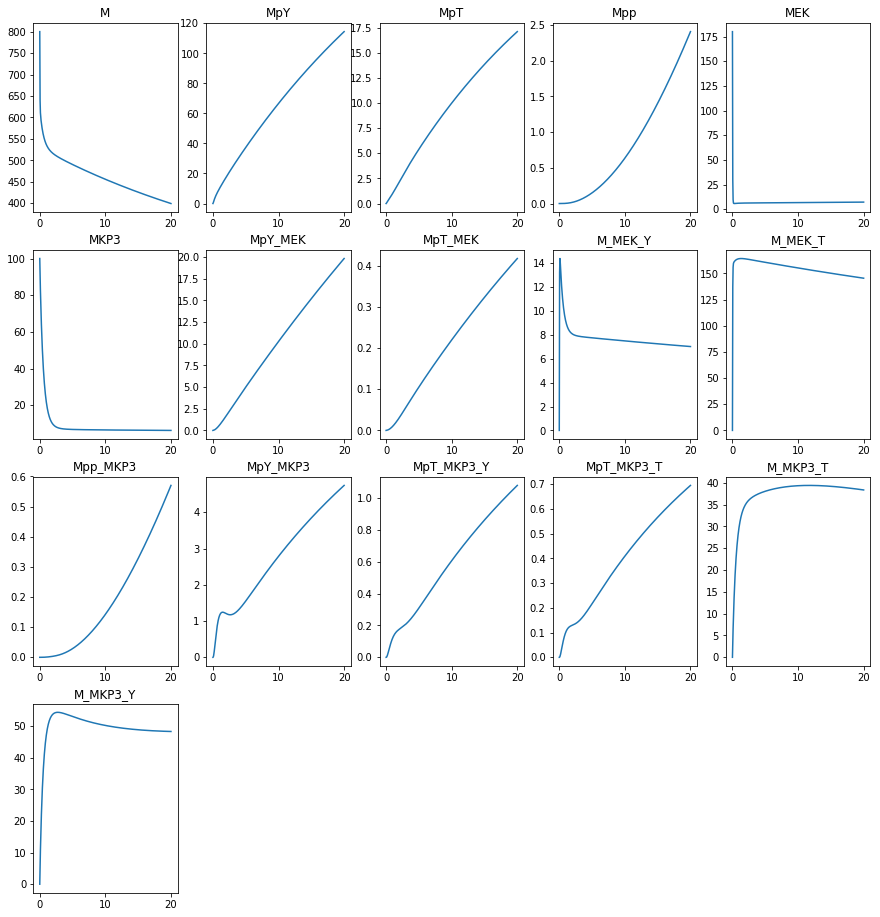

In [4]:
ns = len(sbml_model.listOfSpecies)
plt.figure(figsize=(15,4*int(math.ceil(ns/5.0))))
for n,s in enumerate(sbml_model.listOfSpecies):
    plt.subplot(int(math.ceil(ns/5.0)),5,n+1)
    plt.plot(dresults[0][:,0],dresults[0][:,n+1])
    plt.title(s)

In [5]:
sbml_model.name

'Markevich2004_MAPK_phosphoRandomElementary'

In [6]:
for r in sbml_model.listOfReactions:
    print("{0}\t{1}".format(r,sbml_model.listOfReactions[r].propensity_function))

reaction_0000001	cell * (k1 * M * MEK - k_1 * M_MEK_Y)
reaction_0000002	cell * k2 * M_MEK_Y
reaction_0000003	cell * (k3 * MpY * MEK - k_3 * MpY_MEK)
reaction_0000004	cell * k4 * MpY_MEK
reaction_0000005	cell * (k5 * M * MEK - k_5 * M_MEK_T)
reaction_0000006	cell * k6 * M_MEK_T
reaction_0000007	cell * (k7 * MpT * MEK - k_7 * MpT_MEK)
reaction_0000008	cell * k8 * MpT_MEK
reaction_0000009	cell * (h1 * Mpp * MKP3 - h_1 * Mpp_MKP3)
reaction_0000010	cell * h2 * Mpp_MKP3
reaction_0000011	cell * (h3 * MpT_MKP3_Y - h_3 * MpT * MKP3)
reaction_0000012	cell * h5 * MpT_MKP3_T
reaction_0000013	cell * (h4 * MpT * MKP3 - h_4 * MpT_MKP3_T)
reaction_0000014	cell * h8 * MpY_MKP3
reaction_0000015	cell * (h6 * M_MKP3_T - h_6 * M * MKP3)
reaction_0000017	cell * (h7 * MpY * MKP3 - h_7 * MpY_MKP3)
reaction_0000019	cell * (h9 * M_MKP3_Y - h_9 * M * MKP3)


In [7]:
new_rxns = []
for rname in sbml_model.listOfReactions:
    r = sbml_model.listOfReactions[rname]
    #print r.propensity_function
    rxns = r.propensity_function.replace('cell * ','').replace('(','').replace(')','').split('-')
    #print rxns, r.reactants, r.products
    r1 = gillespy2.Reaction(name=r.name,  reactants=r.reactants, 
                           products=r.products,
                           propensity_function = rxns[0])
    new_rxns.append(r1)
    if len(rxns) > 1:
        r2 = gillespy2.Reaction(name=r.name+'__reverse',  
                               reactants=r.products, 
                               products=r.reactants,
                               propensity_function = rxns[1])
    
        new_rxns.append(r2)
    
    
print(new_rxns)

[<gillespy2.core.gillespy2.Reaction object at 0x7fa2ee216160>, <gillespy2.core.gillespy2.Reaction object at 0x7fa2ee216358>, <gillespy2.core.gillespy2.Reaction object at 0x7fa2ee216a58>, <gillespy2.core.gillespy2.Reaction object at 0x7fa2ee2165f8>, <gillespy2.core.gillespy2.Reaction object at 0x7fa2ee2160b8>, <gillespy2.core.gillespy2.Reaction object at 0x7fa2ee216518>, <gillespy2.core.gillespy2.Reaction object at 0x7fa2ee1d37b8>, <gillespy2.core.gillespy2.Reaction object at 0x7fa2ee1d3a90>, <gillespy2.core.gillespy2.Reaction object at 0x7fa2ee1d3a58>, <gillespy2.core.gillespy2.Reaction object at 0x7fa2ee1d3e10>, <gillespy2.core.gillespy2.Reaction object at 0x7fa2ee1d3b70>, <gillespy2.core.gillespy2.Reaction object at 0x7fa2ee1d3c18>, <gillespy2.core.gillespy2.Reaction object at 0x7fa2ee1d3860>, <gillespy2.core.gillespy2.Reaction object at 0x7fa2ee1d3ef0>, <gillespy2.core.gillespy2.Reaction object at 0x7fa2ee1d3898>, <gillespy2.core.gillespy2.Reaction object at 0x7fa2ee1d3550>, <gilles

In [8]:
for s in sbml_model.listOfSpecies:
    print(s,sbml_model.listOfSpecies[s].initial_value)

M 800.0
MpY 0.0
MpT 0.0
Mpp 0.0
MEK 180.0
MKP3 100.0
MpY_MEK 0.0
MpT_MEK 0.0
M_MEK_Y 0.0
M_MEK_T 0.0
Mpp_MKP3 0.0
MpY_MKP3 0.0
MpT_MKP3_Y 0.0
MpT_MKP3_T 0.0
M_MKP3_T 0.0
M_MKP3_Y 0.0


In [9]:
r = sbml_model.listOfReactions['reaction_0000001']
print(r.propensity_function)
print(r.propensity_function.replace('(','').replace(')','').split())

cell * (k1 * M * MEK - k_1 * M_MEK_Y)
['cell', '*', 'k1', '*', 'M', '*', 'MEK', '-', 'k_1', '*', 'M_MEK_Y']


In [10]:
'''If we assume the volume is 1.0, we can use the existing propensity 
functions when we convert to a stochastic model.'''
class Markevich2004_MAPK_phosphoRandomElementary(gillespy2.Model):
    def __init__(self, concentration_model):
        gillespy2.Model.__init__(self, name="Markevich2004_MAPK_phosphoRandomElementary")
        
        for s in concentration_model.listOfSpecies:
            self.add_species(gillespy2.Species(name=s, initial_value=int(concentration_model.listOfSpecies[s].initial_value)))
            
        for p in concentration_model.listOfParameters:
            self.add_parameter(concentration_model.listOfParameters[p])
            
        #for r in concentration_model.listOfReactions:
        #    self.add_reaction(concentration_model.listOfReactions[r])
        new_rxns = []
        for rname in concentration_model.listOfReactions:
            r = concentration_model.listOfReactions[rname]
            #print r.propensity_function
            rxns = r.propensity_function.replace('cell * ','').replace('(','').replace(')','').split('-')
            #print rxns, r.reactants, r.products
            r1 = gillespy2.Reaction(name=r.name,  reactants=r.reactants, 
                                   products=r.products,
                                   propensity_function = rxns[0])
            new_rxns.append(r1)
            if len(rxns) > 1:
                r2 = gillespy2.Reaction(name=r.name+'__reverse',  
                                       reactants=r.products, 
                                       products=r.reactants,
                                       propensity_function = rxns[1].lstrip())

                new_rxns.append(r2)
        self.add_reaction(new_rxns)

In [11]:
from gillespy2.solvers.numpy.basic_tau_leaping_solver import BasicTauLeapingSolver
stoch_model = Markevich2004_MAPK_phosphoRandomElementary(sbml_model)
sresults = stoch_model.run(solver=BasicTauLeapingSolver(), show_labels=False)

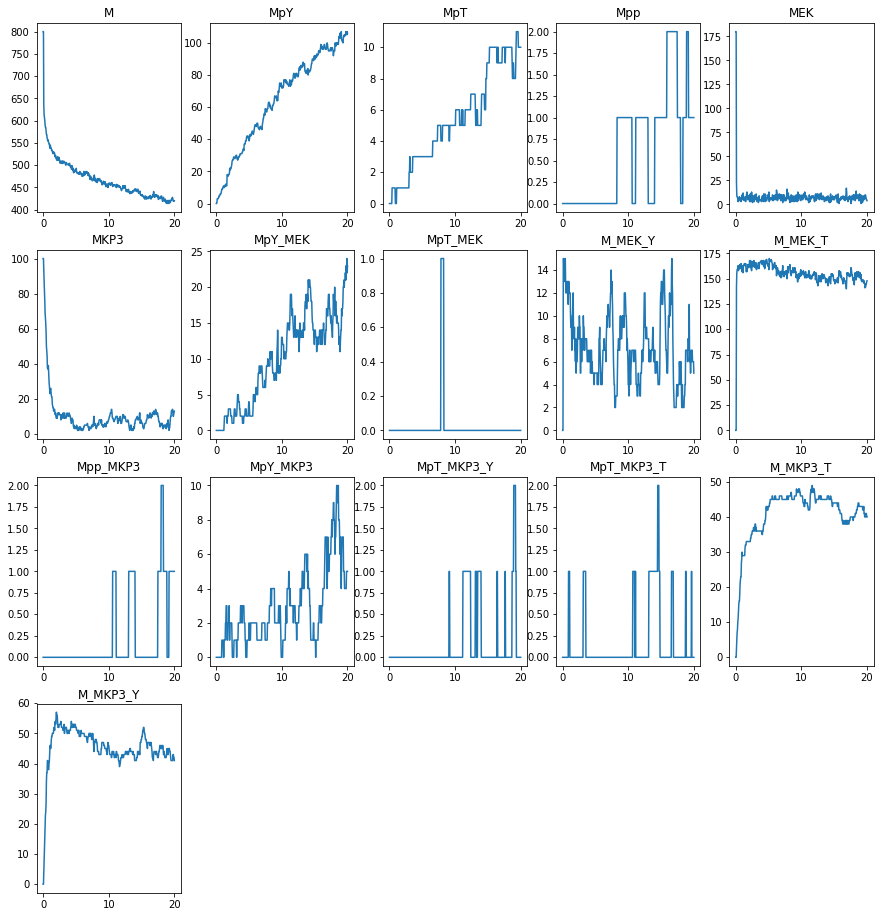

In [12]:
ns = len(stoch_model.listOfSpecies)
plt.figure(figsize=(15,4*int(math.ceil(ns/5.0))))
for n,s in enumerate(stoch_model.listOfSpecies):
    plt.subplot(int(math.ceil(ns/5.0)),5,n+1)
    plt.plot(sresults[0][:,0],sresults[0][:,n+1])
    plt.title(s)